## Nerve trace geometry -- project with Ryckie Wade

#### 1) Plot x, y coordinates


Load the file with coordinates

In [2]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
cadaver_id = 1
input_path = "input_data/" + str(cadaver_id) + "/"

x_file = input_path + "cadaver_x_" + str(cadaver_id) + ".csv"
y_file = input_path + "cadaver_y_" + str(cadaver_id) + ".csv"

files = [x_file, y_file]
raw_coords = []

for file in files:
    with open(file, newline='') as csvfile:
        r = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in r: # There will only ever be one row expected
            # 10 nerve traces, each with clicks_per_trace clicks
            raw_coords.append(row)

Parse coordinates.

In [4]:
# Store in two formats for better computation
x_coords, y_coords = [], []
coords = []

for x, y in zip(raw_coords[0][0].split(","), raw_coords[1][0].split(",")):
        coords.append([float(x), float(y)])
        x_coords.append(float(x))
        y_coords.append(float(y))
        
clicks_per_trace = len(y_coords) / 10

Plot to double check.

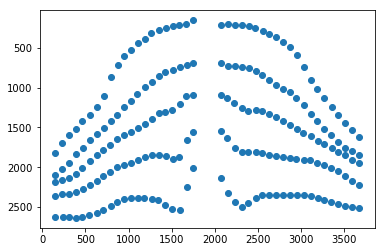

In [5]:
plt.scatter(x_coords, y_coords)
plt.gca().invert_yaxis()
plt.show()

#### 2) Compute acute relative angles

First, compute all angles relative to horizontal for every point except first one for each of 10 nerves

In [6]:
horiz_nerve_angles = []

# Compute nerve by nerve
for i in range(len(x_coords)):
    # Each clicks_per_trace series at at time - horiz_nerve_angles[i] is for point[i-1]
    if i % clicks_per_trace != 0:
        # Non-first point
        dy = abs(y_coords[i] - y_coords[i-1])
        dx = abs(x_coords[i] - x_coords[i-1])
        
        theta = math.degrees(math.atan(float(dy) / float(dx)))
        horiz_nerve_angles.append(theta)
        # print(i, "- dy", round(dy, 1), "- dx", round(dx,1), "- theta", round(theta, 2))
    else:
        horiz_nerve_angles.append(0)

Now compute relative acute angles depending on whether point groups of three are in category:

1. INCLINE or DECLINE -- theta = theta[i-1] - theta[i]
2. VALLEY or PEAK -- theta = theta[i] + theta[i-1]

In [7]:
rel_acute_angles = []

for i in range(len(x_coords)):
    # Ignore first TWO points now - rel_acute_angles[i] is for point[i-1]
    if i % clicks_per_trace not in [0, 1]:
        theta = 0
        
        # The point group of three is a steady increase OR decrease along y axis
        is_increase = (y_coords[i] >= y_coords[i-1]) and (y_coords[i-1] >= y_coords[i-2])
        is_decrease = (y_coords[i] <= y_coords[i-1]) and (y_coords[i-1] <= y_coords[i-2])
        
        # Middle point is a valley or peak
        is_valley = (y_coords[i-2] >= y_coords[i-1]) and (y_coords[i] >= y_coords[i-1])
        is_peak = (y_coords[i-1] >= y_coords[i-2]) and (y_coords[i-1] >= y_coords[i])
        
        if is_increase or is_decrease:
            theta = abs(horiz_nerve_angles[i-1] - horiz_nerve_angles[i]) 
        elif is_peak or is_valley:
            theta = horiz_nerve_angles[i-1] + horiz_nerve_angles[i]

        rel_acute_angles.append(theta)
    else:
        rel_acute_angles.append(0)

Write relative acute angles to csv file.

In [9]:
with open(input_path + "acute_angles_" + str(cadaver_id) + ".csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(10): 
        # 10 nerves, 20 (or clicks_per_trace) angles per nerve
        writer.writerow(rel_acute_angles[int(i*clicks_per_trace):int((i+1)*clicks_per_trace)])


#### 3) Compute max min angles


In [10]:
maxes, mins = [], []

for i in range(10):
    maxes.append(np.max(rel_acute_angles[int(i*clicks_per_trace):int((i+1)*clicks_per_trace)]))
    mins.append(np.min(rel_acute_angles[int(i*clicks_per_trace + 2):int((i+1)*clicks_per_trace)]))

Write the max and min angles for each nerve to a csv file -- first row maxes, second row mins.

In [11]:
with open("max_mins_" + str(cadaver_id) + ".csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(maxes)
    writer.writerow(mins)